In [14]:
import random
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from collections import defaultdict
from PIL import Image
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import requests
import os

In [15]:
df_photoReview_001_selected = pd.read_csv(r"C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\로컬\df_photoReview_001_selected.csv", dtype=object)
df_photoReview_001_selected.rename(columns={'goods_image': 'anchor','reviewImageUrlPhoto':'positive'}, inplace=True)
df_photoReview_001_selected['negative'] = 0
df_photoReview_001_selected = df_photoReview_001_selected\
[['anchor','positive','negative', 'goodsId','reviewIdPhoto','reviewDatePhoto','major_category','mid_category']]
df_photoReview_001_selected

anchor  \
0    https://image.msscdn.net/images/goods_img/2022...   
1    https://image.msscdn.net/images/goods_img/2021...   
2    https://image.msscdn.net/images/goods_img/2021...   
3    https://image.msscdn.net/images/goods_img/2019...   
4    https://image.msscdn.net/images/goods_img/2020...   
..                                                 ...   
895  https://image.msscdn.net/images/goods_img/2021...   
896  https://image.msscdn.net/images/goods_img/2020...   
897  https://image.msscdn.net/images/goods_img/2022...   
898  https://image.msscdn.net/images/goods_img/2022...   
899  https://image.msscdn.net/images/goods_img/2020...   

                                              positive  negative  goodsId  \
0    https://image.msscdn.net/data/estimate/2479585...         0  2479585   
1    https://image.msscdn.net/data/estimate/1876392...         0  1876392   
2    https://image.msscdn.net/data/estimate/1753093...         0  1753093   
3    https://image.msscdn.net/data/estimate/1010593...         0  1010593   
4    https://image.msscdn.net/data/estimate/1382658...         0  1382658   
..                                                 ...       ...      ...   
895  https://image.msscdn.net/data/estimate/2015372...         0  2015372   
896  https://image.msscdn.net/data/estimate/1466673...         0  1466673   
897  https://image.msscdn.net/data/estimate/2373147...         0  2373147   
898  https://image.msscdn.net/data/estimate/2614114...         0  2614114   
899  https://image.msscdn.net/data/estimate/1452270...         0  1452270   

    reviewIdPhoto reviewDatePhoto major_category mid_category  
0        35753611    며칠전으로 표시된 리뷰            001       001001  
1        34475524      2022.11.04            001       001001  
2        30327286      2022.09.05            001       001001  
3        33640215      2022.10.15            001       001001  
4        25902871      2022.03.05            001       001001  
..            ...             ...            ...          ...  
895      35906819    며칠전으로 표시된 리뷰            001       001011  
896      18676906      2021.07.31            001       001011  
897      31043234      2022.08.03            001       001011  
898      29495579      2022.06.18            001       001011  
899      34428997      2022.11.03            001       001011  

[900 rows x 8 columns]

In [3]:
df_photoReview_001_selected.reset_index()

index                                             anchor  \
0        0  https://image.msscdn.net/images/goods_img/2022...   
1        1  https://image.msscdn.net/images/goods_img/2021...   
2        2  https://image.msscdn.net/images/goods_img/2021...   
3        3  https://image.msscdn.net/images/goods_img/2019...   
4        4  https://image.msscdn.net/images/goods_img/2020...   
..     ...                                                ...   
895    895  https://image.msscdn.net/images/goods_img/2021...   
896    896  https://image.msscdn.net/images/goods_img/2020...   
897    897  https://image.msscdn.net/images/goods_img/2022...   
898    898  https://image.msscdn.net/images/goods_img/2022...   
899    899  https://image.msscdn.net/images/goods_img/2020...   

                                              positive  negative  goodsId  \
0    https://image.msscdn.net/data/estimate/2479585...         0  2479585   
1    https://image.msscdn.net/data/estimate/1876392...         0  1876392   
2    https://image.msscdn.net/data/estimate/1753093...         0  1753093   
3    https://image.msscdn.net/data/estimate/1010593...         0  1010593   
4    https://image.msscdn.net/data/estimate/1382658...         0  1382658   
..                                                 ...       ...      ...   
895  https://image.msscdn.net/data/estimate/2015372...         0  2015372   
896  https://image.msscdn.net/data/estimate/1466673...         0  1466673   
897  https://image.msscdn.net/data/estimate/2373147...         0  2373147   
898  https://image.msscdn.net/data/estimate/2614114...         0  2614114   
899  https://image.msscdn.net/data/estimate/1452270...         0  1452270   

    reviewIdPhoto reviewDatePhoto major_category mid_category  
0        35753611    며칠전으로 표시된 리뷰            001       001001  
1        34475524      2022.11.04            001       001001  
2        30327286      2022.09.05            001       001001  
3        33640215      2022.10.15            001       001001  
4        25902871      2022.03.05            001       001001  
..            ...             ...            ...          ...  
895      35906819    며칠전으로 표시된 리뷰            001       001011  
896      18676906      2021.07.31            001       001011  
897      31043234      2022.08.03            001       001011  
898      29495579      2022.06.18            001       001011  
899      34428997      2022.11.03            001       001011  

[900 rows x 9 columns]

In [38]:
def download_image(dataframe):
    for i, row in dataframe.iterrows():
        try:
            j = row['anchor']
            image_res = requests.get(j)
            with open(r"C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_learning_classification\001001\anchor\{}_{}_{}.{}".format(
                    j.split('/')[-3],j.split('/')[-2],j.split('/')[-1][:-4],j[-3:]),"wb") as f: 
                f.write(image_res.content)
        except:
            print(dataframe.loc[i, 'anchor'])
            
        try:
            j = row['positive']
            image_res = requests.get(j)
            with open(r"C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_learning_classification\001001\positive\{}_{}_{}.{}".format(
                    j.split('/')[-3],j.split('/')[-2],j.split('/')[-1][:-4],j[-3:]),"wb") as f: 
                f.write(image_res.content)
        except:
            print(dataframe.loc[i, 'positive'])            


In [16]:
def substitute_a(j):
    base_dir_a = r"C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_learning_classification\001001\anchor"
    for i in os.listdir(base_dir_a):
        if i == (j.split('/')[-3]+'_'+j.split('/')[-2]+'_'+j.split('/')[-1][:-4]+'.'+j[-3:]):
            return os.path.join(base_dir_a ,i)

In [17]:
def substitute_p(j):
    base_dir_p = r"C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_learning_classification\001001\positive"
    for i in os.listdir(base_dir_p):
        if i == (j.split('/')[-3]+'_'+j.split('/')[-2]+'_'+j.split('/')[-1][:-4]+'.'+j[-3:]):
            return os.path.join(base_dir_p ,i)

In [18]:
def myPreprocess_image_fin(fname):
    try:
        img = Image.open(fname)
        img_2 = img.crop((0,0,500,500))
        numpydata = np.array(img__2).astype("float32") /255.0

        return numpydata
    except:
        print('fail', fname)

In [42]:
download_image(df_photoReview_001_selected)

In [59]:
os.listdir(base_dir_a)

['20120509_18591_18591_1_500.jpg',
 '20140327_80727_80727_8_500.jpg',
 '20150604_209988_209988_2_500.jpg',
 '20150924_255192_255192_2_500.jpg',
 '20160212_306321_306321_13_500.jpg',
 '20160318_323097_323097_9_500.jpg',
 '20160510_349766_349766_2_500.jpg',
 '20160715_385163_385163_1_500.jpg',
 '20160912_411668_411668_1_500.jpg',
 '20161118_449522_449522_5_500.jpg',
 '20170313_498261_498261_1_500.jpg',
 '20170322_503506_503506_1_500.jpg',
 '20170322_503624_503624_3_500.jpg',
 '20170424_544238_544238_1_500.jpg',
 '20170510_552760_552760_1_500.jpg',
 '20170602_570584_570584_1_500.jpg',
 '20170606_571783_571783_1_500.jpg',
 '20170831_620641_620641_5_500.jpg',
 '20170831_621275_621275_7_500.jpg',
 '20170901_621986_621986_4_500.jpg',
 '20170925_642076_642076_1_500.jpg',
 '20170926_644025_644025_2_500.jpg',
 '20171106_665796_665796_2_500.jpg',
 '20171120_674732_674732_1_500.jpg',
 '20171130_681070_681070_4_500.jpg',
 '20180201_706961_706961_7_500.jpg',
 '20180212_714459_714459_4_500.jpg',
 '20

In [ ]:
598_20211125_2247463_2247463_1_500.jpg
73_20210323_1859814_1859814_3_500.jpg
제거 전
substitue 실행, list append  row 만들기. 

In [20]:
sample_path_list = []
review_path_list = []
sample_path_drive_list = []
review_path_drive_list = []

for i, row in df_photoReview_001_selected.iterrows():
    anchor_url = row["anchor"]
    sample_path = substitute_a(anchor_url)
    sample_path_list.append(sample_path)
    sample_path_drive = '/content/drive/Othercomputers/내 노트북/001001/anchor/' + sample_path.split('\\')[-1]
    sample_path_drive_list.append(sample_path_drive)
    
    positive_url = row["positive"]
    review_path = substitute_p(positive_url)
    review_path_list.append(review_path)
    review_path_drive = '/content/drive/Othercomputers/내 노트북/001001/positive/' + review_path.split('\\')[-1]
    review_path_drive_list.append(review_path_drive)
    
df_photoReview_001_selected["sample_path_local"] = sample_path_list
df_photoReview_001_selected["review_path_local"] = review_path_list
df_photoReview_001_selected["sample_path_drive"] = sample_path_drive_list
df_photoReview_001_selected["review_path_drive"] = review_path_drive_list

In [21]:
df_photoReview_001_selected.loc[:10, "sample_path_local"]

0     C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_le...
1     C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_le...
2     C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_le...
3     C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_le...
4     C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_le...
5     C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_le...
6     C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_le...
7     C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_le...
8     C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_le...
9     C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_le...
10    C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_le...
Name: sample_path_local, dtype: object

In [22]:
df_photoReview_001_selected.drop(index=598, inplace=True)

In [23]:
df_photoReview_001_selected.drop(index=73, inplace=True)

In [24]:
df_photoReview_001_selected.groupby('mid_category').size()

mid_category
001001     99
001002    100
001003    100
001004    100
001005    100
001006     99
001008    100
001010    100
001011    100
dtype: int64

In [25]:
len(df_photoReview_001_selected)

898

In [25]:

    
img = Image.open(r"C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_learning_classification\001001\anchor\0_20220411_2479585_2479585_1_500.jpg")
img_2 = img.crop((0,0,500,500))
npd = np.array(img_2).astype("float32") /255.0
print(npd.shape)
img_2.show()


(500, 500, 3)


In [26]:
anchor_numpy_list = []

for i, row in df_photoReview_001_selected.iterrows():
    img = Image.open(row["sample_path_local"])
    img_2 = img.crop((0,0,500,500))
    npd = np.array(img_2).astype("float32") /255.0
    try:
        npd = np.reshape(npd, (500,500,3))
    except:
        print(i)
    
#     file = os.path.join(base_dir_a,i)
#     elm = myPreprocess_image_fin(file)
    anchor_numpy_list.append(npd)
    
positive_numpy_list = []
for i, row in df_photoReview_001_selected.iterrows():
    img = Image.open(row["review_path_local"])
    img_2 = img.crop((0,0,500,500))
    npd = np.array(img_2).astype("float32") /255.0
    try:
        npd = np.reshape(npd, (500,500,3))
    except:
        print(i)
    
#     file = os.path.join(base_dir_p,i)
#     elm = myPreprocess_image_fin(file)
    positive_numpy_list.append(npd)
    

df_photoReview_001_selected["anchor_numpy"] = anchor_numpy_list 
df_photoReview_001_selected["positive_numpy"] = positive_numpy_list

In [27]:
anchor_numpy_list

[array([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        ...,
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]], dtype=float32),
 array([[[1., 1., 1.],
         [1., 1.,

In [29]:
positive_numpy_list

[array([[[0.5921569 , 0.5764706 , 0.53333336],
         [0.5921569 , 0.5764706 , 0.53333336],
         [0.5921569 , 0.5764706 , 0.53333336],
         ...,
         [0.68235296, 0.68235296, 0.6509804 ],
         [0.68235296, 0.68235296, 0.6509804 ],
         [0.68235296, 0.68235296, 0.6509804 ]],
 
        [[0.5921569 , 0.5764706 , 0.53333336],
         [0.5921569 , 0.5764706 , 0.53333336],
         [0.59607846, 0.5803922 , 0.5372549 ],
         ...,
         [0.6862745 , 0.6862745 , 0.654902  ],
         [0.6862745 , 0.6862745 , 0.654902  ],
         [0.6862745 , 0.6862745 , 0.654902  ]],
 
        [[0.6       , 0.58431375, 0.5411765 ],
         [0.5882353 , 0.57254905, 0.5294118 ],
         [0.59607846, 0.5803922 , 0.5372549 ],
         ...,
         [0.6901961 , 0.6901961 , 0.65882355],
         [0.6901961 , 0.6901961 , 0.65882355],
         [0.6901961 , 0.6901961 , 0.65882355]],
 
        ...,
 
        [[0.85490197, 0.8392157 , 0.827451  ],
         [0.85882354, 0.84313726, 0.83137

In [126]:
len(anchor_numpy_list)

898

In [127]:
len(positive_numpy_list)

898

In [28]:
df_photoReview_001_selected.to_csv(r"C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_learning_classification\001001\df_photoReview_001_selected_metric.csv", index=False)

In [98]:
df_photoReview_001_selected.groupby("mid_category").size()

mid_category
001001     99
001002    100
001003    100
001004    100
001005    100
001006     99
001008    100
001010    100
001011    100
dtype: int64

In [95]:
aa =df_photoReview_001_selected.groupby("mid_category").get_group("001001").sample(98).loc[0,'anchor_numpy']

In [96]:
aa.shape

(500, 500, 3)

In [107]:
df_photoReview_001_selected.reset_index()

index                                             anchor  \
0        0  https://image.msscdn.net/images/goods_img/2022...   
1        1  https://image.msscdn.net/images/goods_img/2021...   
2        2  https://image.msscdn.net/images/goods_img/2021...   
3        3  https://image.msscdn.net/images/goods_img/2019...   
4        4  https://image.msscdn.net/images/goods_img/2020...   
..     ...                                                ...   
890    895  https://image.msscdn.net/images/goods_img/2021...   
891    896  https://image.msscdn.net/images/goods_img/2020...   
892    897  https://image.msscdn.net/images/goods_img/2022...   
893    898  https://image.msscdn.net/images/goods_img/2022...   
894    899  https://image.msscdn.net/images/goods_img/2020...   

                                              positive  negative  goodsId  \
0    https://image.msscdn.net/data/estimate/2479585...         0  2479585   
1    https://image.msscdn.net/data/estimate/1876392...         0  1876392   
2    https://image.msscdn.net/data/estimate/1753093...         0  1753093   
3    https://image.msscdn.net/data/estimate/1010593...         0  1010593   
4    https://image.msscdn.net/data/estimate/1382658...         0  1382658   
..                                                 ...       ...      ...   
890  https://image.msscdn.net/data/estimate/2015372...         0  2015372   
891  https://image.msscdn.net/data/estimate/1466673...         0  1466673   
892  https://image.msscdn.net/data/estimate/2373147...         0  2373147   
893  https://image.msscdn.net/data/estimate/2614114...         0  2614114   
894  https://image.msscdn.net/data/estimate/1452270...         0  1452270   

    reviewIdPhoto reviewDatePhoto major_category mid_category  \
0        35753611    며칠전으로 표시된 리뷰            001       001001   
1        34475524      2022.11.04            001       001001   
2        30327286      2022.09.05            001       001001   
3        33640215      2022.10.15            001       001001   
4        25902871      2022.03.05            001       001001   
..            ...             ...            ...          ...   
890      35906819    며칠전으로 표시된 리뷰            001       001011   
891      18676906      2021.07.31            001       001011   
892      31043234      2022.08.03            001       001011   
893      29495579      2022.06.18            001       001011   
894      34428997      2022.11.03            001       001011   

                                          anchor_numpy  \
0    [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...   
1    [[[0.8862745, 0.88235295, 0.8666667], [0.88627...   
2    [[[0.79607844, 0.79607844, 0.8039216], [0.7960...   
3    [[[0.9372549, 0.9372549, 0.94509804], [0.93725...   
4    [[[0.8392157, 0.8235294, 0.8117647], [0.839215...   
..                                                 ...   
890  [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...   
891  [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...   
892  [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...   
893  [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...   
894  [[[0.654902, 0.7411765, 0.8352941], [0.6509804...   

                                        positive_numpy  \
0    [[[0.5921569, 0.5764706, 0.53333336], [0.59215...   
1    [[[0.5647059, 0.57254905, 0.6627451], [0.54117...   
2    [[[0.85490197, 0.827451, 0.75686276], [0.85490...   
3    [[[0.8, 0.8039216, 0.8117647], [0.8, 0.8039216...   
4    [[[0.27450982, 0.20392157, 0.0627451], [0.2823...   
..                                                 ...   
890  [[[0.5176471, 0.4862745, 0.44313726], [0.52156...   
891  [[[0.8745098, 0.8862745, 0.84313726], [0.84705...   
892  [[[0.9607843, 0.8666667, 0.69411767], [0.96078...   
893  [[[0.8745098, 0.84705883, 0.78431374], [0.8745...   
894  [[[0.26666668, 0.28627452, 0.3019608], [0.2627...   

                                     sample_path_local  \
0    C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_le...   
1    C:\

In [30]:
height_width = 500

In [31]:
class_idx_dict = {'001001': 0,'001002': 1,'001003': 2,'001004': 3,'001005': 4,'001006': 5,'001008': 6,'001010': 7,'001011': 8}

In [32]:
num_classes = 9


class AnchorPositivePairs(keras.utils.Sequence):
    def __init__(self, num_batchs):
        self.num_batchs = num_batchs

    def __len__(self):
        return self.num_batchs

    def __getitem__(self, _idx):
        x = np.empty((2, num_classes, height_width, height_width, 3), dtype=np.float32)
        for i, row in df_photoReview_001_selected.groupby("mid_category").get_group("001001").sample(99).iterrows():
            class_idx = class_idx_dict['001001']
            x[0, class_idx] = row['anchor_numpy']
            x[1, class_idx] = row['positive_numpy']
        for i, row in df_photoReview_001_selected.groupby("mid_category").get_group("001002").sample(99).iterrows():
            class_idx = class_idx_dict['001002']
            x[0, class_idx] = row['anchor_numpy']
            x[1, class_idx] = row['positive_numpy']
        for i, row in df_photoReview_001_selected.groupby("mid_category").get_group("001003").sample(99).iterrows():
            class_idx = class_idx_dict['001003']
            x[0, class_idx] = row['anchor_numpy']
            x[1, class_idx] = row['positive_numpy']
        for i, row in df_photoReview_001_selected.groupby("mid_category").get_group("001004").sample(99).iterrows():
            class_idx = class_idx_dict['001004']
            x[0, class_idx] = row['anchor_numpy']
            x[1, class_idx] = row['positive_numpy']
        for i, row in df_photoReview_001_selected.groupby("mid_category").get_group("001005").sample(99).iterrows():
            class_idx = class_idx_dict['001005']
            x[0, class_idx] = row['anchor_numpy']
            x[1, class_idx] = row['positive_numpy']
        for i, row in df_photoReview_001_selected.groupby("mid_category").get_group("001006").sample(99).iterrows():
            class_idx = class_idx_dict['001006']
            x[0, class_idx] = row['anchor_numpy']
            x[1, class_idx] = row['positive_numpy']
        for i, row in df_photoReview_001_selected.groupby("mid_category").get_group("001008").sample(99).iterrows():
            class_idx = class_idx_dict['001008']
            x[0, class_idx] = row['anchor_numpy']
            x[1, class_idx] = row['positive_numpy']
        for i, row in df_photoReview_001_selected.groupby("mid_category").get_group("001010").sample(99).iterrows():
            class_idx = class_idx_dict['001010']
            x[0, class_idx] = row['anchor_numpy']
            x[1, class_idx] = row['positive_numpy']
        for i, row in df_photoReview_001_selected.groupby("mid_category").get_group("001011").sample(99).iterrows():
            class_idx = class_idx_dict['001011']
            x[0, class_idx] = row['anchor_numpy']
            x[1, class_idx] = row['positive_numpy']
        
        return x

In [37]:
class EmbeddingModel(keras.Model):
    def train_step(self, data):
        # Note: Workaround for open issue, to be removed.
        if isinstance(data, tuple):
            data = data[0]
        anchors, positives = data[0], data[1]

        with tf.GradientTape() as tape:
            # Run both anchors and positives through model.
            anchor_embeddings = self(anchors, training=True)
            positive_embeddings = self(positives, training=True)

            # Calculate cosine similarity between anchors and positives. As they have
            # been normalised this is just the pair wise dot products.
            similarities = tf.einsum(
                "ae,pe->ap", anchor_embeddings, positive_embeddings
            )

            # Since we intend to use these as logits we scale them by a temperature.
            # This value would normally be chosen as a hyper parameter.
            temperature = 0.2
            similarities /= temperature

            # We use these similarities as logits for a softmax. The labels for
            # this call are just the sequence [0, 1, 2, ..., num_classes] since we
            # want the main diagonal values, which correspond to the anchor/positive
            # pairs, to be high. This loss will move embeddings for the
            # anchor/positive pairs together and move all other pairs apart.
            sparse_labels = tf.range(num_classes)
            loss = self.compiled_loss(sparse_labels, similarities)

        # Calculate gradients and apply via optimizer.
        gradients = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))

        # Update and return metrics (specifically the one for the loss value).
        self.compiled_metrics.update_state(sparse_labels, similarities)
        return {m.name: m.result() for m in self.metrics}

In [38]:
inputs = layers.Input(shape=(500, 500, 3))
x = layers.Conv2D(filters=32, kernel_size=3, strides=2, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, strides=2, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, strides=2, activation="relu")(x)
x = layers.GlobalAveragePooling2D()(x)
embeddings = layers.Dense(units=8, activation=None)(x)
embeddings = tf.nn.l2_normalize(embeddings, axis=-1)

model = EmbeddingModel(inputs, embeddings)


Epoch 1/20
99/99 [==============================] - 148s 1s/step - loss: 2.1507
Epoch 2/20
99/99 [==============================] - 173s 2s/step - loss: 1.9940
Epoch 3/20
99/99 [==============================] - 167s 2s/step - loss: 1.9488
Epoch 4/20
99/99 [==============================] - 149s 2s/step - loss: 1.9191
Epoch 5/20
99/99 [==============================] - 149s 2s/step - loss: 1.9236
Epoch 6/20
99/99 [==============================] - 138s 1s/step - loss: 1.9354
Epoch 7/20
99/99 [==============================] - 147s 1s/step - loss: 1.8883
Epoch 8/20
99/99 [==============================] - 134s 1s/step - loss: 1.8960
Epoch 9/20
99/99 [==============================] - 143s 1s/step - loss: 1.8553
Epoch 10/20
99/99 [==============================] - 148s 1s/step - loss: 1.9012
Epoch 11/20
99/99 [==============================] - 136s 1s/step - loss: 1.8612
Epoch 12/20
99/99 [==============================] - 139s 1s/step - loss: 1.8052
Epoch 13/20
99/99 [==================

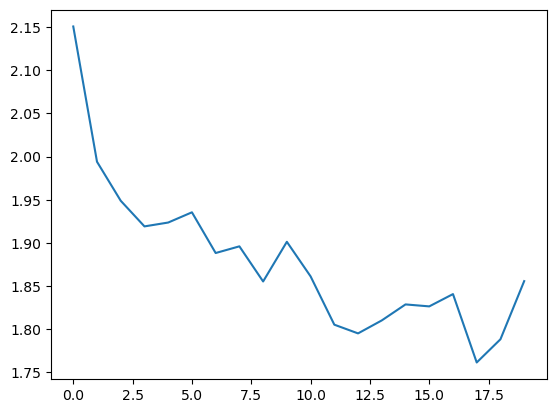

In [39]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
)

history = model.fit(AnchorPositivePairs(num_batchs=99), epochs=20)

plt.plot(history.history["loss"])
plt.show()

In [120]:
df_photoReview_001_selected.to_csv(r"C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_learning_classification\001001\test.csv")

In [36]:
confusion_matrix = np.zeros((num_classes, num_classes))

# For each class.
for class_idx in range(num_classes):
    # Consider 10 examples.
    example_idxs = class_idx_to_test_idxs[class_idx][:10]
    for y_test_idx in example_idxs:
        # And count the classes of its near neighbours.
        for nn_idx in near_neighbours[y_test_idx][:-1]:
            nn_class_idx = y_test[nn_idx]
            confusion_matrix[class_idx, nn_class_idx] += 1

# Display a confusion matrix.
labels = ["001001","001002","001003","001004","001005","001006","001008","001010","001011"]
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=labels)
disp.plot(include_values=True, cmap="viridis", ax=None, xticks_rotation="vertical")
plt.show()

NameError: name 'class_idx_to_test_idxs' is not defined

In [40]:
df_photoReview = pd.read_csv(r"C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\photoReview_merge.csv", dtype=object)

In [42]:
df_photoReview_001 = df_photoReview[df_photoReview["major_category"] == "001"] # 상의

In [44]:
df_photoReview_001_selected_test = df_photoReview_001.groupby("mid_category").sample(10).reset_index()

In [46]:
df_photoReview_001_selected_test 

index  goodsId reviewIdPhoto reviewDatePhoto  \
0   171974  1117513      31291995      2022.08.12   
1   171028   958744      29829291      2022.06.28   
2   172711  1898270      20649869      2021.10.13   
3   166678  1763164      17928121      2021.07.01   
4   172185  1129650      30517266      2022.07.19   
..     ...      ...           ...             ...   
85  174136  1838931      28483841      2022.05.19   
86  174544  2606204      35449392    며칠전으로 표시된 리뷰   
87  175713  1537382      19340206      2021.08.29   
88  174161  2587800      32636929      2022.09.21   
89  173903  2392516      33153734      2022.10.04   

                                  reviewImageUrlPhoto major_category  \
0   https://image.msscdn.net/data/estimate/1117513...            001   
1   https://image.msscdn.net/data/estimate/958744_...            001   
2   https://image.msscdn.net/data/estimate/1898270...            001   
3   https://image.msscdn.net/data/estimate/1763164...            001   
4   https://image.msscdn.net/data/estimate/1129650...            001   
..                                                ...            ...   
85  https://image.msscdn.net/data/estimate/1838931...            001   
86  https://image.msscdn.net/data/estimate/2606204...            001   
87  https://image.msscdn.net/data/estimate/1537382...            001   
88  https://image.msscdn.net/data/estimate/2587800...            001   
89  https://image.msscdn.net/data/estimate/2392516...            001   

   mid_category goods_id                                        goods_image  
0        001001  1117513  https://image.msscdn.net/images/goods_img/2019...  
1        001001   958744  https://image.msscdn.net/images/goods_img/2019...  
2        001001  1898270  https://image.msscdn.net/images/goods_img/2021...  
3        001001  1763164  https://image.msscdn.net/images/goods_img/2021...  
4        001001  1129650  https://image.msscdn.net/images/goods_img/2019...  
..          ...      ...                                                ...  
85       001011  1838931  https://image.msscdn.net/images/goods_img/2021...  
86       001011  2606204  https://image.msscdn.net/images/goods_img/2022...  
87       001011  1537382  https://image.msscdn.net/images/goods_img/2020...  
88       001011  2587800  https://image.msscdn.net/images/goods_img/2022...  
89       001011  2392516  https://image.msscdn.net/images/goods_img/2022...  

[90 rows x 9 columns]

In [47]:
def download_image_test(dataframe):
    for i, row in dataframe.iterrows():
        try:
            j = row['goods_image']
            image_res = requests.get(j)
            with open(r"C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_learning_classification\001001_test\sample\{}_{}_{}.{}".format(
                    j.split('/')[-3],j.split('/')[-2],j.split('/')[-1][:-4],j[-3:]),"wb") as f: 
                f.write(image_res.content)
        except:
            print(dataframe.loc[i, 'goods_image'])
            
        try:
            j = row['reviewImageUrlPhoto']
            image_res = requests.get(j)
            with open(r"C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_learning_classification\001001_test\review\{}_{}_{}.{}".format(
                    j.split('/')[-3],j.split('/')[-2],j.split('/')[-1][:-4],j[-3:]),"wb") as f: 
                f.write(image_res.content)
        except:
            print(dataframe.loc[i, 'reviewImageUrlPhoto'])    

In [48]:
download_image_test(df_photoReview_001_selected_test)

In [49]:
def substitute_a_t(j):
    base_dir_a = r"C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_learning_classification\001001_test\sample"
    for i in os.listdir(base_dir_a):
        if i == (j.split('/')[-3]+'_'+j.split('/')[-2]+'_'+j.split('/')[-1][:-4]+'.'+j[-3:]):
            return os.path.join(base_dir_a ,i)

In [50]:
def substitute_p_t(j):
    base_dir_p = r"C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_learning_classification\001001_test\review"
    for i in os.listdir(base_dir_p):
        if i == (j.split('/')[-3]+'_'+j.split('/')[-2]+'_'+j.split('/')[-1][:-4]+'.'+j[-3:]):
            return os.path.join(base_dir_p ,i)

In [52]:
sample_path_list = []
review_path_list = []
sample_path_drive_list = []
review_path_drive_list = []

for i, row in df_photoReview_001_selected_test.iterrows():
    anchor_url = row['goods_image']
    sample_path = substitute_a_t(anchor_url)
    sample_path_list.append(sample_path)
    sample_path_drive = '/content/drive/Othercomputers/내 노트북/001001_test/sample/' + sample_path.split('\\')[-1]
    sample_path_drive_list.append(sample_path_drive)
    
    positive_url = row['reviewImageUrlPhoto']
    review_path = substitute_p_t(positive_url)
    review_path_list.append(review_path)
    review_path_drive = '/content/drive/Othercomputers/내 노트북/001001_test/review/' + review_path.split('\\')[-1]
    review_path_drive_list.append(review_path_drive)
    
df_photoReview_001_selected_test["sample_path_local"] = sample_path_list
df_photoReview_001_selected_test["review_path_local"] = review_path_list
df_photoReview_001_selected_test["sample_path_drive"] = sample_path_drive_list
df_photoReview_001_selected_test["review_path_drive"] = review_path_drive_list

In [53]:
df_photoReview_001_selected_test

index  goodsId reviewIdPhoto reviewDatePhoto  \
0   171974  1117513      31291995      2022.08.12   
1   171028   958744      29829291      2022.06.28   
2   172711  1898270      20649869      2021.10.13   
3   166678  1763164      17928121      2021.07.01   
4   172185  1129650      30517266      2022.07.19   
..     ...      ...           ...             ...   
85  174136  1838931      28483841      2022.05.19   
86  174544  2606204      35449392    며칠전으로 표시된 리뷰   
87  175713  1537382      19340206      2021.08.29   
88  174161  2587800      32636929      2022.09.21   
89  173903  2392516      33153734      2022.10.04   

                                  reviewImageUrlPhoto major_category  \
0   https://image.msscdn.net/data/estimate/1117513...            001   
1   https://image.msscdn.net/data/estimate/958744_...            001   
2   https://image.msscdn.net/data/estimate/1898270...            001   
3   https://image.msscdn.net/data/estimate/1763164...            001   
4   https://image.msscdn.net/data/estimate/1129650...            001   
..                                                ...            ...   
85  https://image.msscdn.net/data/estimate/1838931...            001   
86  https://image.msscdn.net/data/estimate/2606204...            001   
87  https://image.msscdn.net/data/estimate/1537382...            001   
88  https://image.msscdn.net/data/estimate/2587800...            001   
89  https://image.msscdn.net/data/estimate/2392516...            001   

   mid_category goods_id                                        goods_image  \
0        001001  1117513  https://image.msscdn.net/images/goods_img/2019...   
1        001001   958744  https://image.msscdn.net/images/goods_img/2019...   
2        001001  1898270  https://image.msscdn.net/images/goods_img/2021...   
3        001001  1763164  https://image.msscdn.net/images/goods_img/2021...   
4        001001  1129650  https://image.msscdn.net/images/goods_img/2019...   
..          ...      ...                                                ...   
85       001011  1838931  https://image.msscdn.net/images/goods_img/2021...   
86       001011  2606204  https://image.msscdn.net/images/goods_img/2022...   
87       001011  1537382  https://image.msscdn.net/images/goods_img/2020...   
88       001011  2587800  https://image.msscdn.net/images/goods_img/2022...   
89       001011  2392516  https://image.msscdn.net/images/goods_img/2022...   

                                    sample_path_local  \
0   C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_le...   
1   C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_le...   
2   C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_le...   
3   C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_le...   
4   C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_le...   
..                                                ...   
85  C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_le...   
86  C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_le...   
87  C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_le...   
88  C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_le...   
89  C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_le...   

                                    review_path_local  \
0   C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_le...   
1   C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_le...   
2   C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_le...   
3   C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_le...   
4   C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_le...   
..                                                ...   
85  C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_le...   
86  C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_le...   
87  C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_le...   
88  C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_le...   
89  C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_le...   

                                    sample_path_drive  \
0   /content/drive/Othercomputers/내 노트북/001001_tes...   
1   /content/drive/Othercomputers/내 노트북/001001_tes...   
2   /content/

In [54]:
df_photoReview_001_selected_test.to_csv(r"C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\metric_learning_classification\001001_test\df_photoReview_001_selected_test.csv", index=False)

In [56]:
anchor_numpy_list = []

for i, row in df_photoReview_001_selected_test.iterrows():
    img = Image.open(row["sample_path_local"])
    img_2 = img.crop((0,0,500,500))
    npd = np.array(img_2).astype("float32") /255.0
    try:
        npd = np.reshape(npd, (500,500,3))
    except:
        print(i)
    
#     file = os.path.join(base_dir_a,i)
#     elm = myPreprocess_image_fin(file)
    anchor_numpy_list.append(npd)
    
positive_numpy_list = []
for i, row in df_photoReview_001_selected_test.iterrows():
    img = Image.open(row["review_path_local"])
    img_2 = img.crop((0,0,500,500))
    npd = np.array(img_2).astype("float32") /255.0
    try:
        npd = np.reshape(npd, (500,500,3))
    except:
        print(i)
    
#     file = os.path.join(base_dir_p,i)
#     elm = myPreprocess_image_fin(file)
    positive_numpy_list.append(npd)
    

df_photoReview_001_selected_test["anchor_numpy"] = anchor_numpy_list 
df_photoReview_001_selected_test["positive_numpy"] = positive_numpy_list

In [88]:
x_test_1 = np.empty((10, num_classes, height_width, height_width, 3), dtype=np.float32)
x_test_2 = np.empty((10, num_classes, height_width, height_width, 3), dtype=np.float32)
class_idx_dict = {'001001': 0,'001002': 1,'001003': 2,'001004': 3,'001005': 4,'001006': 5,'001008': 6,'001010': 7,'001011': 8}
for i in range(10):
    class_idx = class_idx_dict['001001']
    x_test_1[i,class_idx] = df_photoReview_001_selected_test.groupby("mid_category").get_group("001001").reset_index().loc[i, 'anchor_numpy']
    x_test_2[i,class_idx] = df_photoReview_001_selected_test.groupby("mid_category").get_group("001001").reset_index().loc[i, 'positive_numpy']
for i in range(10):
    class_idx = class_idx_dict['001002']
    x_test_1[i,class_idx] = df_photoReview_001_selected_test.groupby("mid_category").get_group("001002").reset_index().loc[i, 'anchor_numpy']
    x_test_2[i,class_idx] = df_photoReview_001_selected_test.groupby("mid_category").get_group("001002").reset_index().loc[i, 'positive_numpy']
for i in range(10):
    class_idx = class_idx_dict['001003']
    x_test_1[i,class_idx] = df_photoReview_001_selected_test.groupby("mid_category").get_group("001003").reset_index().loc[i, 'anchor_numpy']
    x_test_2[i,class_idx] = df_photoReview_001_selected_test.groupby("mid_category").get_group("001003").reset_index().loc[i, 'positive_numpy']
for i in range(10):
    class_idx = class_idx_dict['001004']
    x_test_1[i,class_idx] = df_photoReview_001_selected_test.groupby("mid_category").get_group("001004").reset_index().loc[i, 'anchor_numpy']
    x_test_2[i,class_idx] = df_photoReview_001_selected_test.groupby("mid_category").get_group("001004").reset_index().loc[i, 'positive_numpy']
for i in range(10):
    class_idx = class_idx_dict['001005']
    x_test_1[i,class_idx] = df_photoReview_001_selected_test.groupby("mid_category").get_group("001005").reset_index().loc[i, 'anchor_numpy']
    x_test_2[i,class_idx] = df_photoReview_001_selected_test.groupby("mid_category").get_group("001005").reset_index().loc[i, 'positive_numpy']
for i in range(10):
    class_idx = class_idx_dict['001006']
    x_test_1[i,class_idx] = df_photoReview_001_selected_test.groupby("mid_category").get_group("001006").reset_index().loc[i, 'anchor_numpy']
    x_test_2[i,class_idx] = df_photoReview_001_selected_test.groupby("mid_category").get_group("001006").reset_index().loc[i, 'positive_numpy']
for i in range(10):
    class_idx = class_idx_dict['001008']
    x_test_1[i,class_idx] = df_photoReview_001_selected_test.groupby("mid_category").get_group("001008").reset_index().loc[i, 'anchor_numpy']
    x_test_2[i,class_idx] = df_photoReview_001_selected_test.groupby("mid_category").get_group("001008").reset_index().loc[i, 'positive_numpy']
for i in range(10):
    class_idx = class_idx_dict['001010']
    x_test_1[i,class_idx] = df_photoReview_001_selected_test.groupby("mid_category").get_group("001010").reset_index().loc[i, 'anchor_numpy']
    x_test_2[i,class_idx] = df_photoReview_001_selected_test.groupby("mid_category").get_group("001010").reset_index().loc[i, 'positive_numpy']
for i in range(10):
    class_idx = class_idx_dict['001011']
    x_test_1[i,class_idx] = df_photoReview_001_selected_test.groupby("mid_category").get_group("001011").reset_index().loc[i, 'anchor_numpy']
    x_test_2[i,class_idx] = df_photoReview_001_selected_test.groupby("mid_category").get_group("001011").reset_index().loc[i, 'positive_numpy']
           


    
# for i, row in df_photoReview_001_selected_test.groupby("mid_category").get_group("001002").sample(1).iterrows():
#     class_idx = class_idx_dict['001002']
#     x_test_1[class_idx] = row['anchor_numpy']
#     x_test_2[class_idx] = row['positive_numpy']
# for i, row in df_photoReview_001_selected_test.groupby("mid_category").get_group("001003").sample(1).iterrows():
#     class_idx = class_idx_dict['001003']
#     x_test_1[class_idx] = row['anchor_numpy']
#     x_test_2[class_idx] = row['positive_numpy']
# for i, row in df_photoReview_001_selected_test.groupby("mid_category").get_group("001004").sample(1).iterrows():
#     class_idx = class_idx_dict['001004']
#     x_test_1[class_idx] = row['anchor_numpy']
#     x_test_2[class_idx] = row['positive_numpy']
# for i, row in df_photoReview_001_selected_test.groupby("mid_category").get_group("001005").sample(1).iterrows():
#     class_idx = class_idx_dict['001005']
#     x_test_1[class_idx] = row['anchor_numpy']
#     x_test_2[class_idx] = row['positive_numpy']
# for i, row in df_photoReview_001_selected_test.groupby("mid_category").get_group("001006").sample(1).iterrows():
#     class_idx = class_idx_dict['001006']
#     x_test_1[class_idx] = row['anchor_numpy']
#     x_test_2[class_idx] = row['positive_numpy']
# for i, row in df_photoReview_001_selected_test.groupby("mid_category").get_group("001008").sample(9).iterrows():
#     class_idx = class_idx_dict['001008']
#     x_test_1[class_idx] = row['anchor_numpy']
#     x_test_2[class_idx] = row['positive_numpy']
# for i, row in df_photoReview_001_selected_test.groupby("mid_category").get_group("001010").sample(9).iterrows():
#     class_idx = class_idx_dict['001010']
#     x_test_1[class_idx] = row['anchor_numpy']
#     x_test_2[class_idx] = row['positive_numpy']
# for i, row in df_photoReview_001_selected_test.groupby("mid_category").get_group("001011").sample(9).iterrows():
#     class_idx = class_idx_dict['001011']
#     x_test_1[class_idx] = row['anchor_numpy']
#     x_test_2[class_idx] = row['positive_numpy']

In [89]:
len(x_test_1)

10

In [91]:
near_neighbours_per_example = 11

embeddings = model.predict(x_test_1)
gram_matrix = np.einsum("ae,be->ab", embeddings, embeddings)
near_neighbours = np.argsort(gram_matrix.T)[:, -(near_neighbours_per_example + 1) :]

InvalidArgumentError: Graph execution error:

Detected at node 'embedding_model_1/conv2d_3/Relu' defined at (most recent call last):
    File "C:\Users\panda\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\panda\Anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\panda\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\panda\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\panda\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\panda\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\panda\Anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\panda\Anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\panda\Anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\panda\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\panda\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\panda\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\panda\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\panda\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\panda\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\panda\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "C:\Users\panda\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "C:\Users\panda\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\panda\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\panda\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\panda\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\panda\AppData\Local\Temp\ipykernel_18976\859147625.py", line 3, in <module>
      embeddings = model.predict(x_test_1)
    File "C:\Users\panda\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\panda\Anaconda3\lib\site-packages\keras\engine\training.py", line 2350, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Users\panda\Anaconda3\lib\site-packages\keras\engine\training.py", line 2137, in predict_function
      return step_function(self, iterator)
    File "C:\Users\panda\Anaconda3\lib\site-packages\keras\engine\training.py", line 2123, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\panda\Anaconda3\lib\site-packages\keras\engine\training.py", line 2111, in run_step
      outputs = model.predict_step(data)
    File "C:\Users\panda\Anaconda3\lib\site-packages\keras\engine\training.py", line 2079, in predict_step
      return self(x, training=False)
    File "C:\Users\panda\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\panda\Anaconda3\lib\site-packages\keras\engine\training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\panda\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\panda\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\panda\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\panda\Anaconda3\lib\site-packages\keras\engine\functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\panda\Anaconda3\lib\site-packages\keras\engine\functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\panda\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\panda\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\panda\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\panda\Anaconda3\lib\site-packages\keras\layers\convolutional\base_conv.py", line 314, in call
      return self.activation(outputs)
    File "C:\Users\panda\Anaconda3\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "C:\Users\panda\Anaconda3\lib\site-packages\keras\backend.py", line 5369, in relu
      x = tf.nn.relu(x)
Node: 'embedding_model_1/conv2d_3/Relu'
convolution input must be 4-dimensional: [10,9,500,500,3]
	 [[{{node embedding_model_1/conv2d_3/Relu}}]] [Op:__inference_predict_function_12866]

In [77]:
near_neighbours

array([[5, 1, 8, 6, 7, 3, 2, 4, 0],
       [0, 4, 2, 7, 6, 3, 5, 8, 1],
       [5, 8, 1, 3, 6, 7, 0, 4, 2],
       [0, 4, 2, 5, 1, 8, 7, 6, 3],
       [5, 8, 1, 3, 6, 7, 0, 2, 4],
       [0, 4, 2, 7, 6, 3, 8, 1, 5],
       [0, 4, 2, 5, 8, 1, 3, 7, 6],
       [0, 4, 2, 5, 8, 1, 3, 6, 7],
       [0, 4, 2, 7, 6, 3, 5, 1, 8]], dtype=int64)

In [78]:
near_neighbours_per_example = 11

embeddings = model.predict(x_test_2)
gram_matrix = np.einsum("ae,be->ab", embeddings, embeddings)
near_neighbours = np.argsort(gram_matrix.T)[:, -(near_neighbours_per_example + 1) :]

1/1 [==============================] - 0s 97ms/step


In [79]:
near_neighbours

array([[5, 8, 3, 6, 1, 7, 2, 4, 0],
       [4, 0, 2, 5, 7, 6, 8, 3, 1],
       [5, 8, 3, 6, 1, 7, 4, 0, 2],
       [4, 0, 2, 7, 5, 6, 8, 1, 3],
       [5, 8, 3, 6, 1, 7, 2, 0, 4],
       [4, 0, 2, 7, 6, 1, 3, 8, 5],
       [4, 0, 2, 5, 7, 3, 1, 8, 6],
       [5, 4, 2, 8, 0, 3, 6, 1, 7],
       [4, 0, 2, 7, 5, 1, 6, 3, 8]], dtype=int64)

In [64]:
near_neighbours_per_example = 5

embeddings = model.predict(x_test_2)
gram_matrix = np.einsum("ae,be->ab", embeddings, embeddings)
near_neighbours = np.argsort(gram_matrix.T)[:, -(near_neighbours_per_example + 1) :]

1/1 [==============================] - 0s 96ms/step


In [65]:
near_neighbours

array([[1, 7, 4, 2, 8, 0],
       [8, 2, 5, 4, 7, 1],
       [1, 4, 7, 0, 8, 2],
       [1, 0, 8, 2, 6, 3],
       [8, 2, 5, 1, 7, 4],
       [8, 2, 4, 1, 7, 5],
       [1, 0, 8, 2, 3, 6],
       [8, 2, 5, 4, 1, 7],
       [1, 7, 4, 2, 0, 8]], dtype=int64)

In [73]:
near_neighbours_per_example = 10

embeddings = model.predict(x_test_2)
gram_matrix = np.einsum("ae,be->ab", embeddings, embeddings)
near_neighbours = np.argsort(gram_matrix.T)[:, -(near_neighbours_per_example + 1) :]

1/1 [==============================] - 0s 107ms/step


In [74]:
near_neighbours

array([[8, 4, 7, 6, 1, 2, 5, 3, 0],
       [4, 8, 7, 0, 6, 2, 3, 5, 1],
       [3, 5, 0, 8, 4, 1, 7, 6, 2],
       [4, 8, 7, 6, 2, 1, 5, 0, 3],
       [3, 5, 0, 1, 2, 7, 6, 8, 4],
       [4, 8, 7, 6, 2, 0, 3, 1, 5],
       [0, 3, 5, 1, 2, 4, 8, 7, 6],
       [0, 3, 5, 1, 2, 4, 6, 8, 7],
       [0, 3, 5, 1, 2, 4, 6, 7, 8]], dtype=int64)

In [66]:
near_neighbours_per_example = 12

embeddings = model.predict(x_test_2)
gram_matrix = np.einsum("ae,be->ab", embeddings, embeddings)
near_neighbours = np.argsort(gram_matrix.T)[:, -(near_neighbours_per_example + 1) :]

1/1 [==============================] - 0s 100ms/step


In [67]:
near_neighbours

array([[5, 3, 6, 1, 7, 4, 2, 8, 0],
       [3, 6, 0, 8, 2, 5, 4, 7, 1],
       [3, 6, 5, 1, 4, 7, 0, 8, 2],
       [4, 5, 7, 1, 0, 8, 2, 6, 3],
       [3, 6, 0, 8, 2, 5, 1, 7, 4],
       [3, 6, 0, 8, 2, 4, 1, 7, 5],
       [4, 5, 7, 1, 0, 8, 2, 3, 6],
       [3, 6, 0, 8, 2, 5, 4, 1, 7],
       [5, 3, 6, 1, 7, 4, 2, 0, 8]], dtype=int64)